In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('Master_data.csv')
df.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/km,day_of_week,month,year
138279,10170250,2017-05-09,Yellow Cab,CHICAGO IL,33.35,450.63,408.2040,4824,Card,Female,56,10360,1955130,164468,42.4260,1.272144,Tuesday,May,2017
109533,10133932,2017-01-11,Yellow Cab,NEW YORK NY,41.73,944.92,545.8284,2289,Card,Male,33,16489,8405837,302149,399.0916,9.563662,Wednesday,January,2017
272712,10334781,2018-06-06,Yellow Cab,NEW YORK NY,7.14,213.86,91.6776,561,Card,Female,22,17181,8405837,302149,122.1824,17.112381,Wednesday,June,2018
59416,10074272,2016-09-08,Yellow Cab,NEW YORK NY,32.34,709.96,407.4840,1535,Card,Female,36,14844,8405837,302149,302.4760,9.352999,Thursday,September,2016
297079,10364973,2018-08-27,Pink Cab,NEW YORK NY,8.33,116.77,94.9620,1662,Card,Female,44,13954,8405837,302149,21.8080,2.618007,Monday,August,2018


In [3]:
print(df.shape)
df.info()

(359392, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  profit              359392 non-null  float64
 15  profit/km           3

### Compare Yellow Cab and Pink Cab from Different Aspects

### What's the profit rate of Cab market? Which company has higher profit rate?

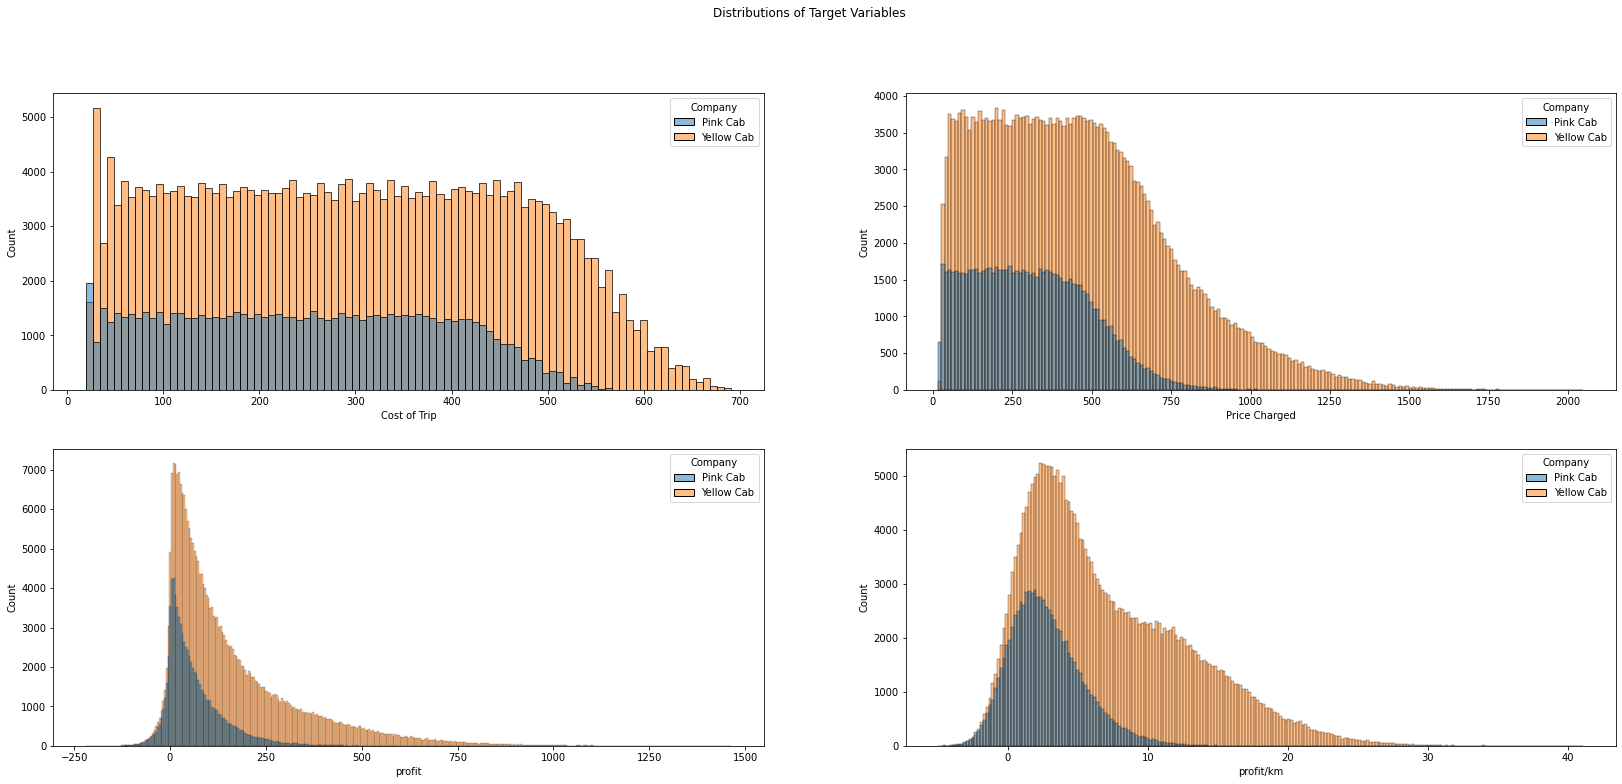

In [4]:
plt.figure(figsize=[28, 12])

plt.subplot(2, 2, 1)
plt.suptitle('Distributions of Target Variables')
sns.histplot(data=df , x='Cost of Trip' , hue="Company")

plt.subplot(2, 2, 2)
sns.histplot(data=df , x='Price Charged' , hue="Company")

plt.subplot(2, 2, 3)
sns.histplot(data=df , x='profit' , hue="Company")

plt.subplot(2, 2, 4)
sns.histplot(data=df , x='profit/km' , hue="Company");

- From the above plots we can observe that profit distribution is skewed to the right. Also, it can be noted that Yellow cab consistently have higher prices hence higher profits as compared to Pink Cab.  
- It is also interesting to see Pink cab has a longer distribution below 0 which implies more loses.

### Which Taxi Cab has the bigger market Share

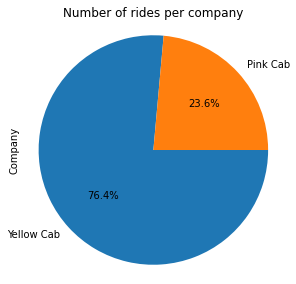

Text(0.5, 1.0, '')

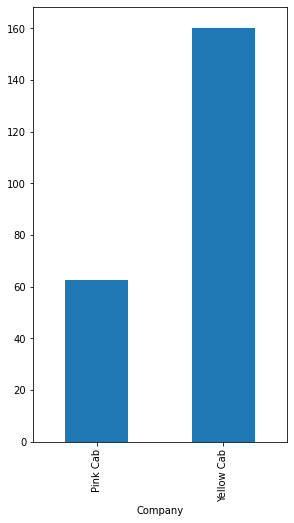

In [55]:
labels=['Pink Cab', 'Yellow Cab']
plt.figure(figsize=[10, 8])

plt.subplot(1, 2, 1)
company = df['Company'].value_counts()
company.plot(kind='pie', autopct='%1.1f%%', counterclock = False)
plt.axis('square')
plt.title('Number of rides per company')
plt.show()

plt.subplot(1, 2, 2)
ax=df.groupby('Company')['profit'].mean()
ax.plot(figsize=(10,8), kind='bar')
#sns.barplot(data=df, x='Company', y='profit', ci=None)
plt.title('')

#### Market share per city

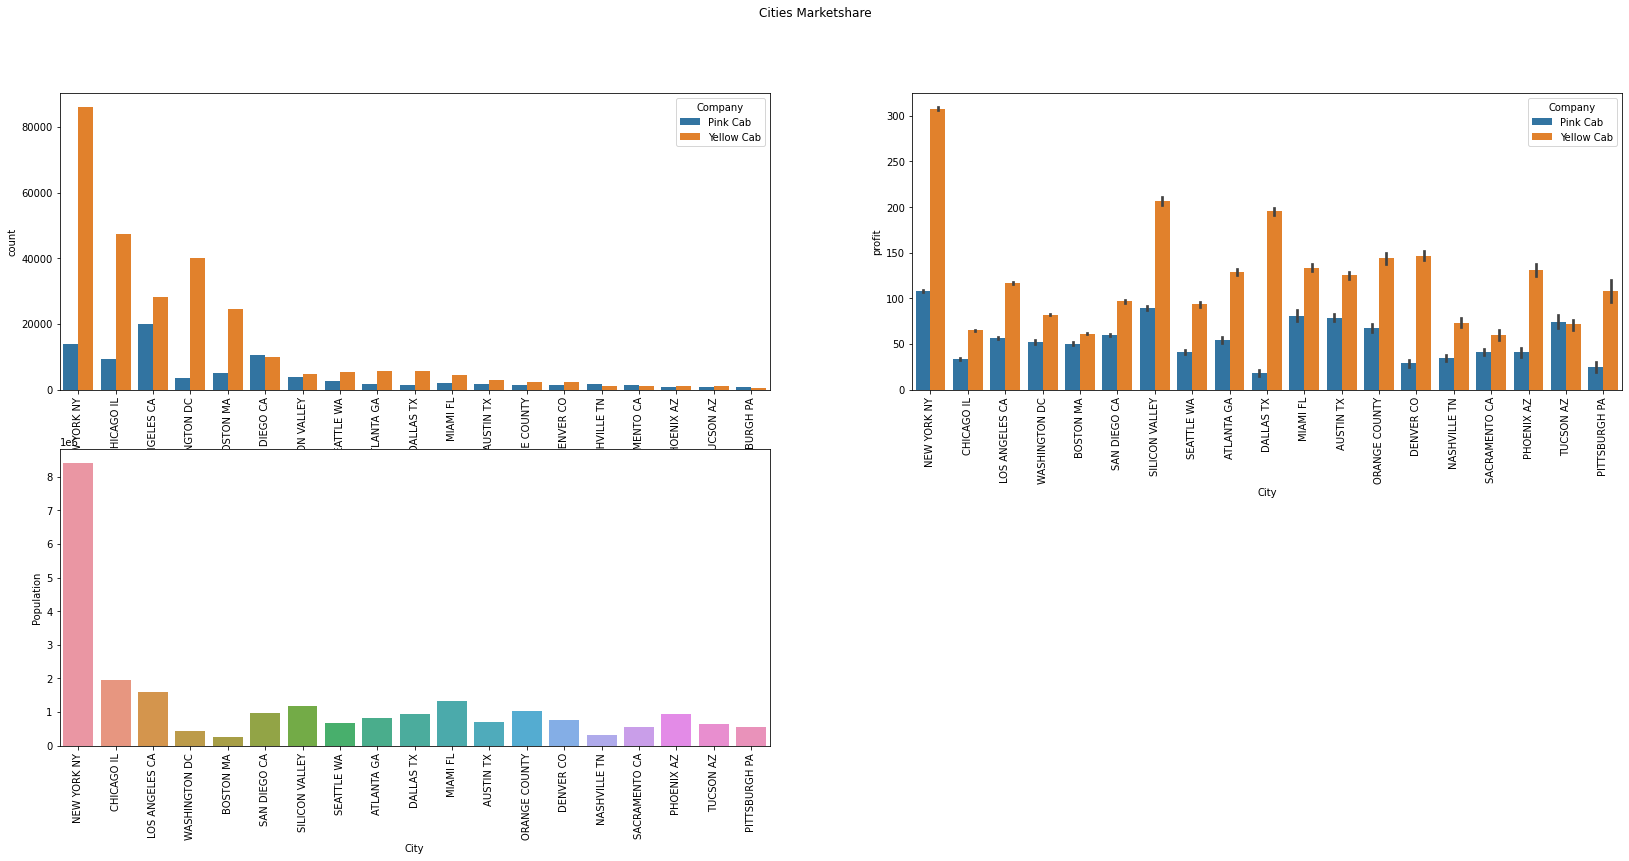

In [54]:
plt.figure(figsize=[28, 12])
plt.suptitle('Cities Marketshare')
plt.subplot(2, 2, 1)
sns.countplot(x='City', data=df, order = df['City'].value_counts().index, hue='Company')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.barplot(data=df, x='City', y='profit', hue='Company', order = df['City'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.barplot(data=df, x='City', y='Population', order = df['City'].value_counts().index)
plt.xticks(rotation=90);

As for marketshare, Yellow cab leads in most cities, except in San Diego, Nashville, Pittsburgh and Sacramento where Pink Taxi has a slight lead. As for profits, Yellow cab leads in all but Tuscon where Pink Cab only leads. This can be attributed to the fact that Yellow cab generates higher profits per kilometer.

### Market share as per the population

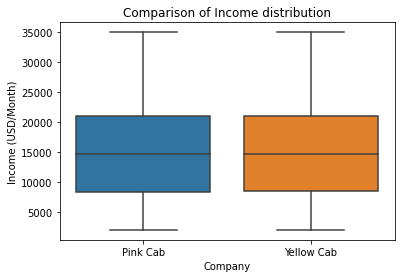

In [7]:

sns.boxplot(x='Company', y='Income (USD/Month)', data=df)
plt.title('Comparison of Income distribution');

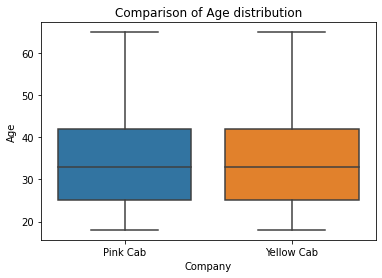

In [8]:
sns.boxplot(x='Company', y='Age', data=df)
plt.title('Comparison of Age distribution');

From the above charts it can be observed that the age and income distibution is similar between the two cab companies.


### Daily Market share

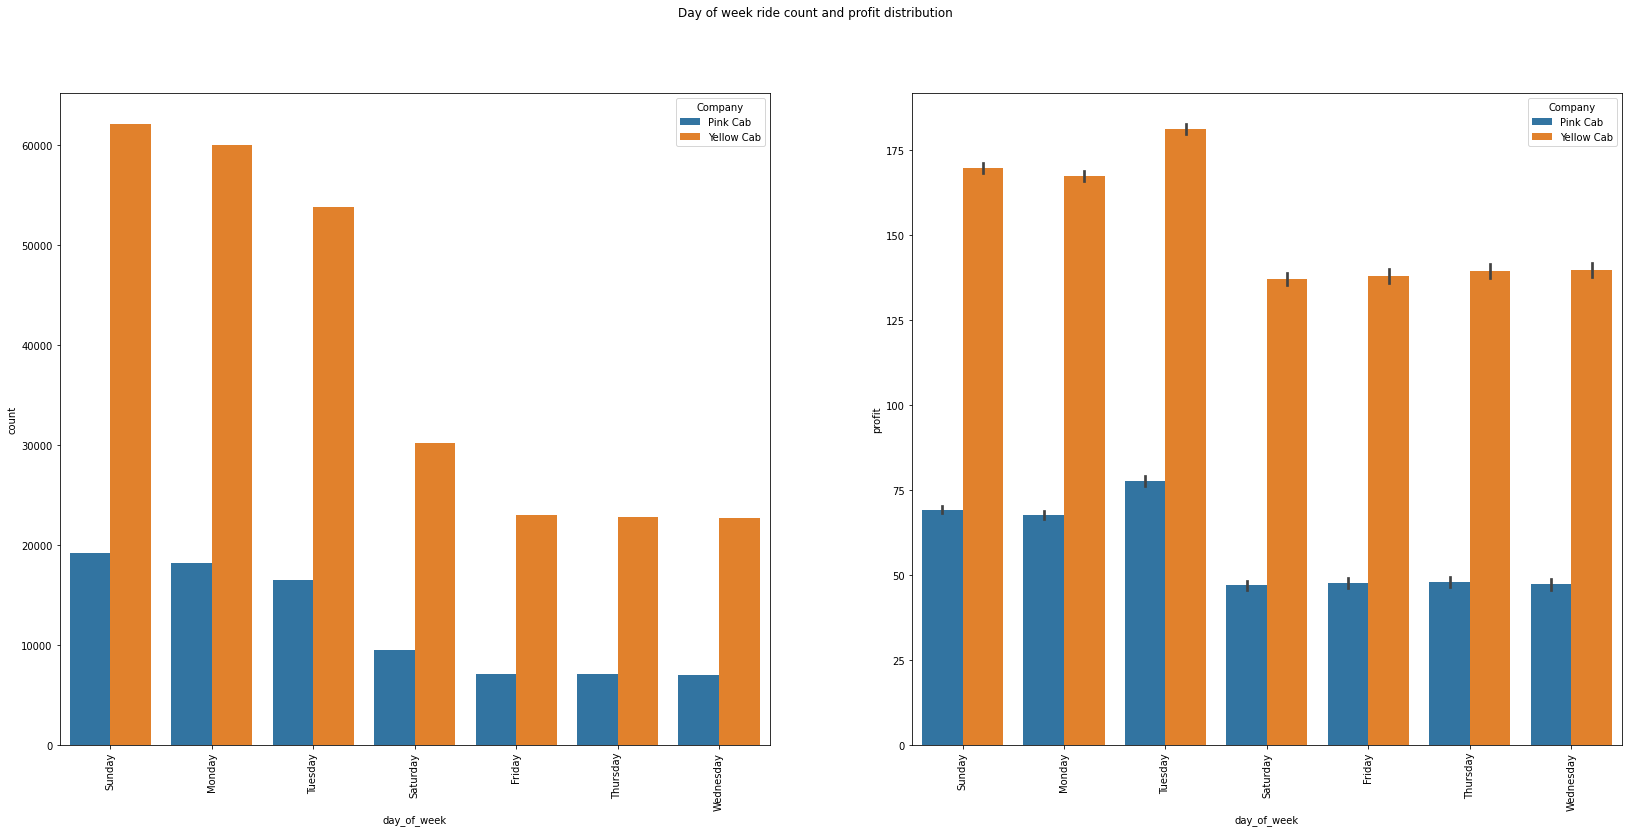

In [13]:
plt.figure(figsize=[28, 12])
plt.suptitle('Day of week ride count and profit distribution')
plt.subplot(1, 2, 1)
sns.countplot(x='day_of_week', data=df, order = df['day_of_week'].value_counts().index, hue='Company')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='day_of_week', y='profit', hue='Company', order = df['day_of_week'].value_counts().index)
plt.xticks(rotation=90);

Although Sundays have the highest ride counts Tuesdays seems to be the most profitable day. This goes to show the number of rides only doesn't determinne the total profits.

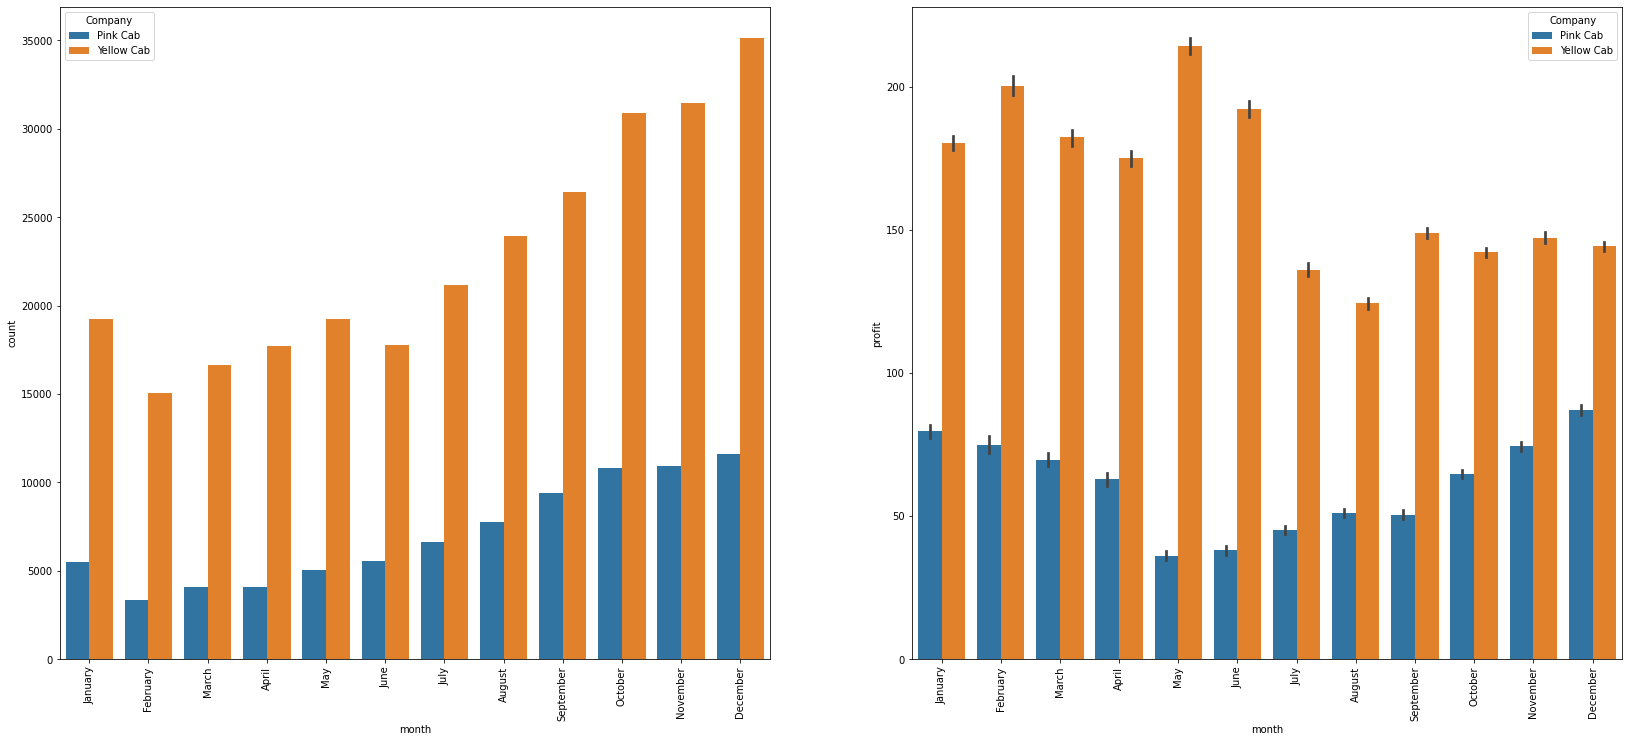

In [23]:
plt.figure(figsize=[28, 12])
plt.suptitle('')
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=df, hue='Company')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='month', y='profit', hue='Company')
plt.xticks(rotation=90);

While all cab companies have the highest number of rides in December, the average profit is highest for Pink Cab in Dec while for Yellow Cab, it's highest average profit appears to be in  May. 

### Year over Year profit 


In [45]:
for column in df.columns:
    if ' ' in column:
        df = df.rename(columns={column:column.replace(' ','_')})

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
year                                      
2016     27.510324   56.732665   50.846041
2017     26.955680   56.688265   50.593881
2018     21.577220   48.340302   42.819031
2019     28.931736   31.359424   30.880859


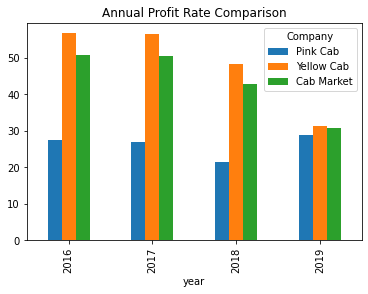

In [48]:
Annual_Profit_Rate = df.groupby(['year','Company']).profit.sum().unstack()/df.groupby(['year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = df.groupby(['year']).profit.sum()/df.groupby(['year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

In 2016 and 2017, Yellow cab had a profit rate of 56%. This reduced to 48% in 2018. It can be noted that 2019 includes data for the month of January only.

### Conclusion
- Yellow cab maintained a higher profit rate at 48-56% in the year 2016 to 2018. Thia makes it the most profitable company.
- Yellow Cab has a bigger market share because it's the preferred cab in highly populated cities like New York, Miami, Chicago.
- In terms of charges, Yellow cab charges earn more profit per Km hence making it more profitable.

#### Which Company should XYZ company to invest in?
- XYZ should consider investing in Yellow company scompany 